In [62]:
# Do not delete this cell. It ensures that you can do the imports,
# load datasets etc. in the same fashion as in any Python script
# in the project template.


import sys
sys.path.insert(0, '../..')
from bld.project_paths import project_paths_join as ppj
from bld.project_paths import project_paths as pp



In [63]:
import numpy as np
import json
import pickle
import pandas as pd
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})


In [64]:
data = pd.read_pickle(ppj("OUT_DATA", "data_individual_level.pickle"))

In [65]:
data_last_sg = data.loc[(data['super_game'] == 3) &
                             (data['treatment'] == '1H2A') ].copy()
# data_last_sg_1H2A = data.loc[(data['super_game'] == 1) &
#                              (data['treatment'] == '1H2A') ]

Reshape the data to wide format

In [66]:
data_subset = data_last_sg[['participant.code', 'round', 'price']]
data_subset_pivot = data_subset.pivot(index='participant.code', columns='round', values='price')
data_subset_pivot.reset_index(level=0, inplace=True)


In [67]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture


In [68]:
# Create a subset of the dataframe that contains only the prices by round for each subject
X_matrix = data_subset_pivot[list(range(1, 12))]
model = GaussianMixture(n_components=3, random_state=0).fit(X_matrix)


In [69]:
model.bic(X_matrix)

-1229.550639167203

In [70]:
data_subset_pivot

round,participant.code,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,6ovvlcsz,3.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,3.0
1,6z0bmgq7,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
2,7bzlspnk,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
3,9wtvl183,3.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
4,e05bghwh,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
5,ffod48om,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
6,fjwornif,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
7,fyxptm6l,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
8,l68s75kr,2.0,3.0,1.0,3.0,2.0,1.0,2.0,3.0,3.0,1.0,2.0
9,mrysk7sy,1.0,4.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [71]:
data_subset_pivot['type'] = model.predict(X_matrix)
# data_subset_pivot['participant.code'] = data_subset_pivot.index
# data_subset_pivot.reset_index(level=0, inplace=True)

data_type_classification = data_subset_pivot[['participant.code', 'type']]

In [72]:
data_last_sg = data_last_sg.merge(data_type_classification, how='left', on='participant.code')

In [73]:
data_last_sg.groupby(['type'])['participant.code'].nunique() / len(data_last_sg['participant.code'].unique())

type
0    0.476190
1    0.285714
2    0.238095
Name: participant.code, dtype: float64

In [74]:
def make_line_plot_type(data_in, all_types):
    plt.style.use('bmh')

    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
    plt.subplots_adjust(wspace = 0.09)
    all_colors = sns.color_palette('bright')
    all_markers = ["v", "s", "P", "X", "d"]
    all_dashes = [(0, (1, 10)),(0, (1, 1)),  (0, (5, 10)),(0, (3, 10, 1, 10)),  (0, (3, 5, 1, 5, 1, 5))]
    xmax_by_sg = [25,17,11]
    
    # Make line plots
    for ix_current_type, current_type in enumerate(all_types):
        sns.lineplot(x = 'round', y='winning_price', data=data_in.loc[(data_in['type'] == current_type)],
            ci = 90, ax=axes,  err_kws={'alpha': 0.01}, color = all_colors[ix_current_type],
            marker = all_markers[ix_current_type], label = current_type)

    

        axes.set_xticks([i for i in range(1,11+1,2)])
        axes.set_xlabel('Round')
        axes.set_ylabel('')


    # Scale of axis
    axes.set_ylim([0,5])
    axes.set_yticks(range(1,5,1))

    axes.hlines(1, xmax=11, xmin=1, label= 'Nash Equilibrium', colors='gray')
    axes.hlines(4, xmax=11, xmin=1, label= 'Monopoly Price', colors= 'black')
    axes.legend(loc='lower center', bbox_to_anchor =(0.5,-0.5), ncol=3)



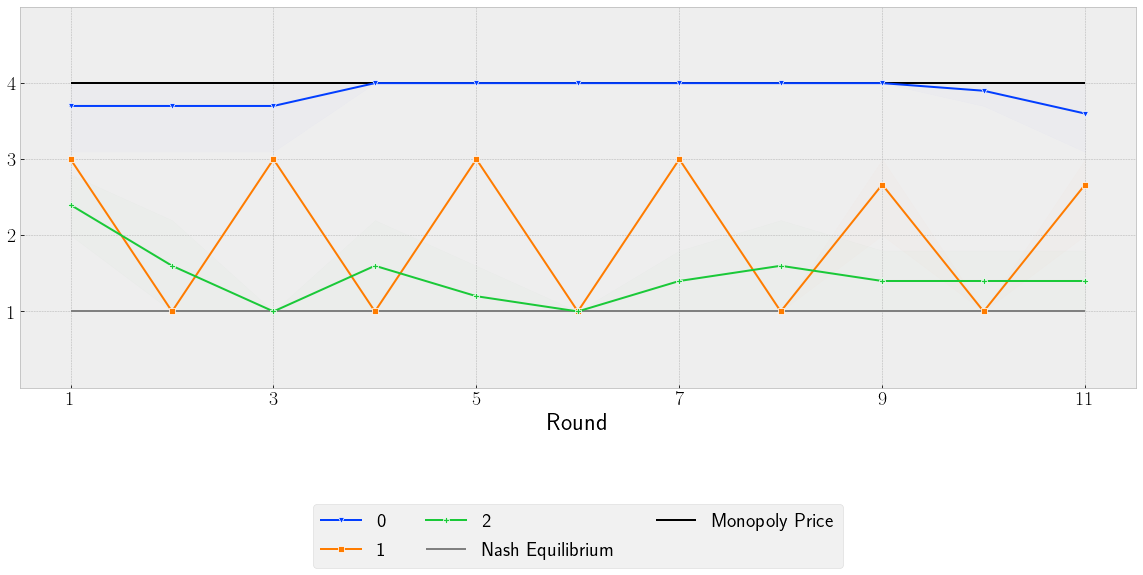

In [75]:
make_line_plot_type(data_last_sg, data_last_sg['type'].unique())

In [76]:
data_cooperater = data_last_sg.loc[data_last_sg['type'] == 0].groupby(['participant.code'], as_index=False)['winning_price'].mean().copy()
data_not_cooperater = data_last_sg.loc[data_last_sg['type'] != 0].groupby(['participant.code'], as_index=False)['winning_price'].mean().copy()

In [77]:
data_last_sg_humans = data.loc[(data['super_game'] == 3) &
                             (data['treatment'] == '3H0A') ].copy()

In [78]:
from scipy.stats import mannwhitneyu

In [79]:
mannwhitneyu(
    data_last_sg_humans.groupby(['super_group_id_general'])['winning_price'].mean(),
    data_cooperater['winning_price'].values,
    alternative='two-sided',
    use_continuity=False
)

MannwhitneyuResult(statistic=3.0, pvalue=0.0012126454136237783)

In [80]:
mannwhitneyu(
    data_last_sg_humans.groupby(['super_group_id_general'])['winning_price'].mean(),
    data_not_cooperater['winning_price'].values,
    alternative='two-sided',
    use_continuity=False
)

MannwhitneyuResult(statistic=57.0, pvalue=0.09027677038420827)

In [81]:
data_not_cooperater['winning_price'].values

array([2.09090909, 1.36363636, 1.27272727, 1.36363636, 1.81818182,
       2.09090909, 1.72727273, 2.09090909, 2.09090909, 1.45454545,
       2.09090909])

In [82]:
data_last_sg_humans.groupby(['super_group_id_general'])['winning_price'].mean()

super_group_id_general
session_02062021_1000_1         1.303030
session_02062021_1000_2         3.060606
session_02062021_1130_1         2.151515
session_07062021_1130_1         1.939394
session_07062021_1130_2         2.454545
session_08062021_1630_3H0A_1    3.939394
session_17062021_1600_1         1.969697
Name: winning_price, dtype: float64